In [38]:
# Импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [39]:
# Загрузка и объединение данных
passengers = pd.read_csv('passengers.csv')
drivers = pd.read_csv('drivers.csv')
taxi_2 = pd.read_csv('taxi_2.csv')

merged_drivers_passengers = pd.merge(passengers, drivers, on='journey_id', how='inner')
taxi = pd.concat([merged_drivers_passengers, taxi_2], ignore_index=True)
taxi.head()

,journey_id,user_id,start_type,start_lat,start_lon,source,driver_score,driver_id,taxi_id,icon,start_at,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,asap,"-12,13983536","-77,02355957",iPhone,5.0,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,2010-11-16 16:44:00,2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,asap,"-12,13874817","-76,99536133",iPhone,NaN,NaN,NaN,executive,2010-06-01 00:34:00,2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,asap,"-12,12453079","-77,02780151",iPhone,NaN,NaN,NaN,executive,2010-05-31 05:01:00,2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,asap,"-12,13885117","-76,99530029",iPhone,NaN,NaN,NaN,executive,2010-06-01 00:29:00,2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,reserved,"-12,08995438","-76,92626953",iPhone,4.0,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,2010-09-11 23:55:00,2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,5.0


In [40]:
# Анализ типов данных
data_types = merged_drivers_passengers.dtypes
merged_drivers_passengers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11555 entries, 0 to 11554
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   journey_id        11555 non-null  object 
 1   user_id           11555 non-null  object 
 2   start_type        11555 non-null  object 
 3   start_lat         11555 non-null  object 
 4   start_lon         11555 non-null  object 
 5   source            11500 non-null  object 
 6   driver_score      3151 non-null   float64
 7   driver_id         8170 non-null   object 
 8   taxi_id           8170 non-null   object 
 9   icon              11555 non-null  object 
 10  start_at          11555 non-null  object 
 11  end_at            11284 non-null  object 
 12  end_lat           11555 non-null  object 
 13  end_lon           11555 non-null  object 
 14  end_state         11543 non-null  object 
 15  driver_start_lat  8164 non-null   object 
 16  driver_start_lon  8164 non-null   object

In [41]:
# Анализ источников заказов
counts_source = taxi['source'].nunique()
counts_source

5

In [42]:
# Анализ распределения заказов по платформам
counts_per_source = taxi.groupby('source')['journey_id'].nunique()
max_count = counts_per_source.max()
total_trips = counts_per_source.sum()
max_source_percente = (max_count / total_trips) * 100
max_source_percente.round()

np.float64(42.0)

In [43]:
# Визуализация распределения заказов по платформам
platforms = taxi.groupby('source')['journey_id'].nunique().sort_values(ascending=False)
platforms

source
iPhone     9741
web        7631
Android    4909
iPad        571
Wap         136
Name: journey_id, dtype: int64

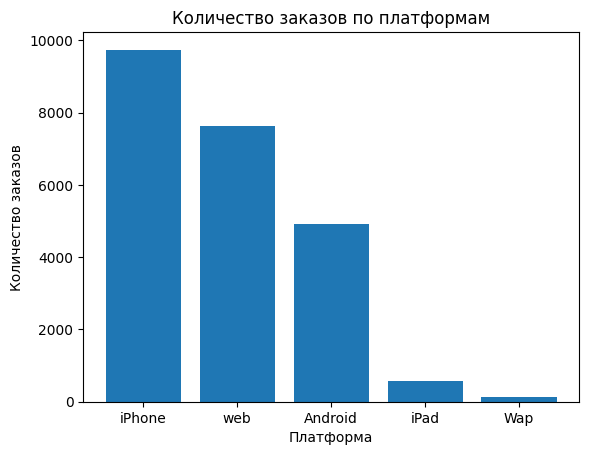

In [44]:

plt.bar(platforms.index, platforms.values)

plt.xlabel('Платформа')
plt.ylabel('Количество заказов')
plt.title('Количество заказов по платформам')

plt.show()

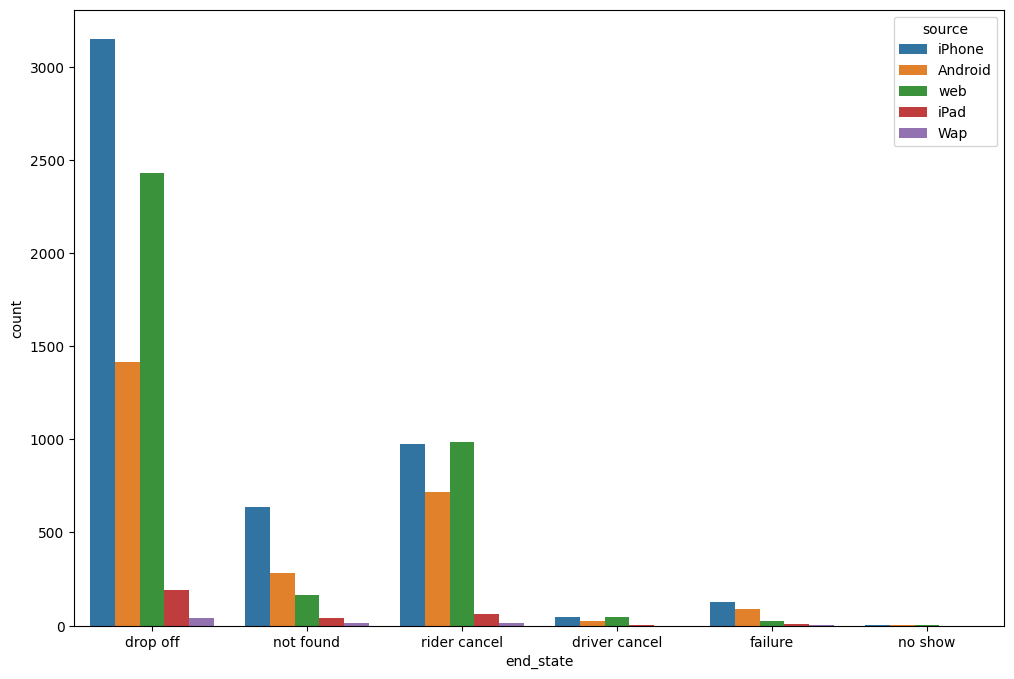

In [8]:
plt.figure(figsize=(12, 8))
sns.countplot(data=merged_drivers_passengers, x='end_state', hue='source')
plt.show()

In [45]:
# Анализ оценок водителей
driver_score_counts = (
    taxi.driver_score
        .value_counts(normalize=True)
        .mul(100)
        .round(2)
        .reset_index()
)
driver_score_counts.columns = ['driver_score', 'percentage']
driver_score_counts = driver_score_counts.sort_values('percentage', ascending=False)

driver_score_counts

,driver_score,percentage
0,5.0,58.81
1,4.0,21.88
2,0.0,14.30
3,3.0,2.97
4,1.0,1.23
5,2.0,0.81


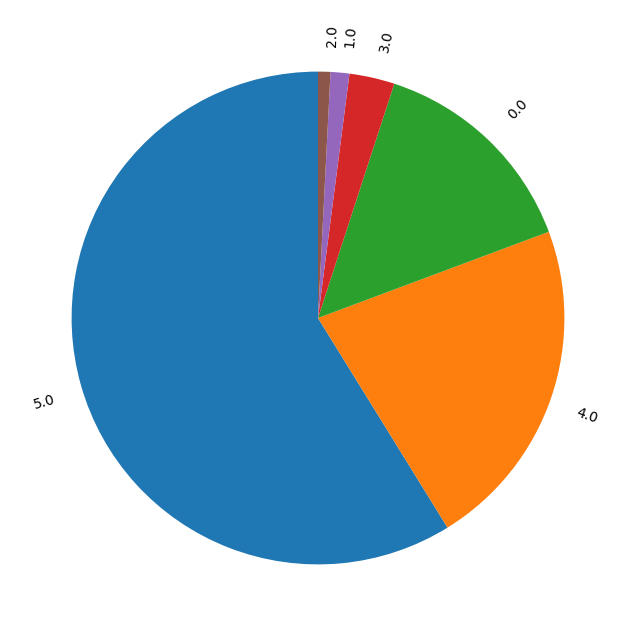

In [46]:
plt.figure(figsize = (8, 8))
plt.pie(driver_score_counts['percentage'],
        startangle = 90,
        labels = driver_score_counts['driver_score'],
        rotatelabels=True);

In [47]:
# Анализ оценок пассажиров
rider_score_counts = (
    taxi.rider_score
        .value_counts(normalize=True)
        .mul(100)
        .round(2)
        .reset_index()
)
rider_score_counts.columns = ['rider_score', 'percentage']
rider_score_counts = rider_score_counts.sort_values('percentage', ascending=False)

rider_score_counts

,rider_score,percentage
0,5.0,87.10
1,4.0,8.83
2,0.0,2.29
3,3.0,1.38
4,1.0,0.21
5,2.0,0.19


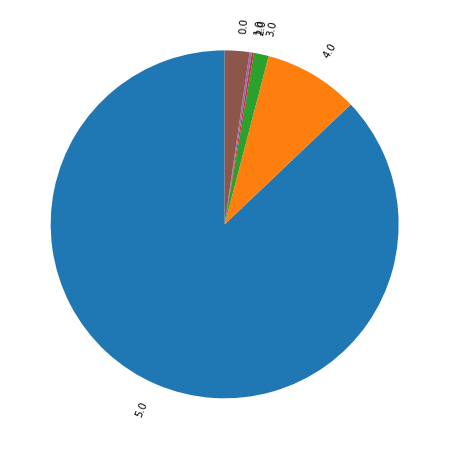

In [10]:
labels = rider_score_counts['rider_score'].astype(str)
sizes = rider_score_counts['percentage']
plt.figure(figsize=(8, 8))

plt.pie(sizes, labels=labels, startangle=90, rotatelabels=True)
plt.show()

In [49]:
# Анализ времени ожидания
taxi[['start_at', 'end_at', 'arrived_at']] = taxi[['start_at', 'end_at', 'arrived_at']].apply(pd.to_datetime)
taxi = taxi.query("start_type=='asap' or start_type=='reserved'")
taxi.head()

,journey_id,user_id,start_type,start_lat,start_lon,source,driver_score,driver_id,taxi_id,icon,start_at,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,asap,"-12,13983536","-77,02355957",iPhone,5.0,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,2010-11-16 16:44:00,2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,asap,"-12,13874817","-76,99536133",iPhone,NaN,NaN,NaN,executive,2010-06-01 00:34:00,2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaT,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,asap,"-12,12453079","-77,02780151",iPhone,NaN,NaN,NaN,executive,2010-05-31 05:01:00,2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaT,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,asap,"-12,13885117","-76,99530029",iPhone,NaN,NaN,NaN,executive,2010-06-01 00:29:00,2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaT,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,reserved,"-12,08995438","-76,92626953",iPhone,4.0,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,2010-09-11 23:55:00,2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,5.0


In [52]:
taxi['wait_time'] = taxi['arrived_at'] - taxi['start_at']
taxi['wait_time'].median()

Timedelta('0 days 00:05:00')

In [50]:
# Анализ водителей с наибольшим количеством опозданий
on_time = pd.to_timedelta(0)
on_time

Timedelta('0 days 00:00:00')

In [53]:
taxi.query('start_type == "reserved" and wait_time > @on_time').driver_id.value_counts().idxmax()

taxi.query('start_type == "reserved" and wait_time > @on_time', engine='python').driver_id.value_counts().idxmax()

'406921adcca37705ef527b4246c0cfea'

In [27]:
taxi[taxi['driver_id'] == '406921adcca37705ef527b4246c0cfea'].head()

,journey_id,user_id,start_type,start_lat,start_lon,source,driver_score,driver_id,taxi_id,icon,start_at,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,rider_score,wait_time
9,9448070ece760ea5386e5d4822121a6c,dd23cf0ef33ae44e0c0b4c756e1fe4e8,asap,"-12,08969627","-77,03574926",Android,5.0,406921adcca37705ef527b4246c0cfea,406921adcca37705ef527b4246c10d2c,executive,2010-11-22 23:42:00,2010-11-23 00:53:00,"-12,03449872","-77,03020982",drop off,"-12,0898203","-77,0358663",2010-11-23 00:05:00,5.0,0 days 00:23:00
21,7abecd4f47c2c1d5390d86eb221babff,d0d21e2cc815fa276295ce3c51811d4e,asap,"-12,0834957","-77,0493404",web,NaN,406921adcca37705ef527b4246c0cfea,406921adcca37705ef527b4246c10d2c,executive,2010-04-26 21:42:00,2010-04-26 21:59:00,"-12,068517","-77,041334",drop off,"-12,08911977","-77,03838321",2010-04-26 21:51:00,0.0,0 days 00:09:00
23,23be2836bd1f20bf05c9ffa3aa6db37c,410389a59b3c36fa86e76bce43d9a336,reserved,"-12,1099832","-76,975818",web,NaN,406921adcca37705ef527b4246c0cfea,406921adcca37705ef527b4246c10d2c,executive,2010-05-20 16:27:00,2010-05-20 17:16:00,"-12,1254832","-77,0293897",drop off,"-12,098508","-76,99515788",2010-05-20 16:16:00,5.0,-1 days +23:49:00
67,eb06449983dd990ff162c0ad990909ba,933a5cf7834b12121755b8586b53a083,reserved,"-12,12078476","-76,97079468",iPhone,4.0,406921adcca37705ef527b4246c0cfea,406921adcca37705ef527b4246c10d2c,executive,2010-06-01 22:00:00,2010-06-01 22:42:00,"-12,07870483","-77,06329346",drop off,"-12,11143646","-76,99240794",2010-06-01 22:01:00,5.0,0 days 00:01:00
87,ddda7d9d71d2000dcf144987a3ea3d61,68fe4d0ad82cc2d715d1319533380c76,asap,"-12,10496521","-77,04000854",iPhone,NaN,406921adcca37705ef527b4246c0cfea,406921adcca37705ef527b4246c10d2c,executive,2010-09-28 02:03:00,2010-09-28 02:04:00,"-12,10495377","-77,03707886",driver cancel,"-12,09203639","-77,02922599",NaT,NaN,NaT


In [54]:
# Анализ временных характеристик поездок
taxi['start_at'] = pd.to_datetime(taxi['start_at'])
taxi['month'] = taxi['start_at'].dt.month
taxi['weekday'] = taxi['start_at'].dt.day_name()
taxi[['month', 'weekday']]

,month,weekday
0,11,Tuesday
1,6,Tuesday
2,5,Monday
3,6,Tuesday
4,9,Saturday
...,...,...
23106,7,Saturday
23107,10,Saturday
23108,9,Tuesday
23109,4,Thursday


In [55]:
# Анализ количества поездок по месяцам
pickups_per_month = taxi.groupby('month')['journey_id'].nunique().sort_values(ascending=True)
pickups_per_month

month
1      573
2      766
3      983
4     1445
7     1512
5     1584
6     1936
8     2120
9     2598
11    3021
10    3240
12    3313
Name: journey_id, dtype: int64

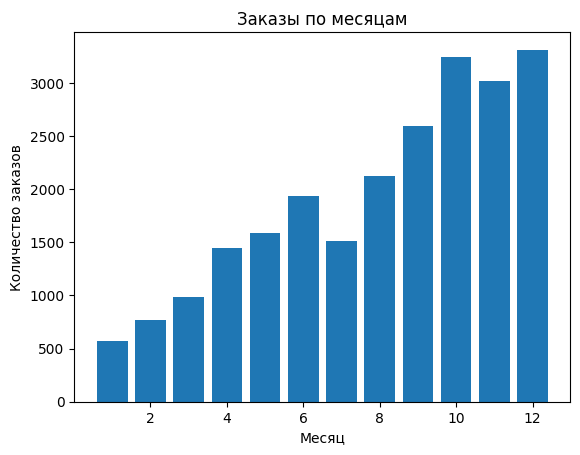

In [30]:
plt.bar(pickups_per_month.index, pickups_per_month.values)

plt.xlabel('Месяц')
plt.ylabel('Количество заказов')
plt.title('Заказы по месяцам')

plt.show()

In [31]:
pickups_per_day = taxi.groupby('weekday')['journey_id'].nunique().sort_values(ascending=True)
pickups_per_day

weekday
Wednesday    2322
Tuesday      2965
Thursday     3133
Friday       3332
Saturday     3569
Sunday       3752
Monday       4018
Name: journey_id, dtype: int64

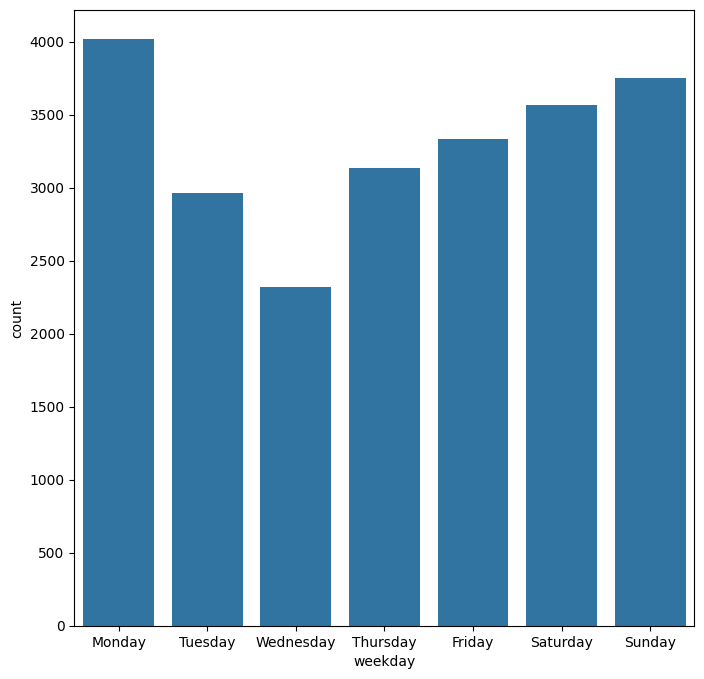

In [32]:
plt.figure(figsize=(8, 8))
sns.countplot(data=taxi, x='weekday', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show()

In [33]:
taxi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23091 entries, 0 to 23110
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype          
---  ------            --------------  -----          
 0   journey_id        23091 non-null  object         
 1   user_id           23091 non-null  object         
 2   start_type        23091 non-null  object         
 3   start_lat         23091 non-null  object         
 4   start_lon         23091 non-null  object         
 5   source            22968 non-null  object         
 6   driver_score      7647 non-null   float64        
 7   driver_id         19719 non-null  object         
 8   taxi_id           19719 non-null  object         
 9   icon              23091 non-null  object         
 10  start_at          23091 non-null  datetime64[ns] 
 11  end_at            22817 non-null  datetime64[ns] 
 12  end_lat           23091 non-null  object         
 13  end_lon           23091 non-null  object         
 14  end_state  

In [34]:
mau = taxi.groupby('month')['user_id'].nunique()
mau

month
1     102
2     110
3     162
4     253
5     275
6     309
7     318
8     377
9     416
10    437
11    504
12    569
Name: user_id, dtype: int64

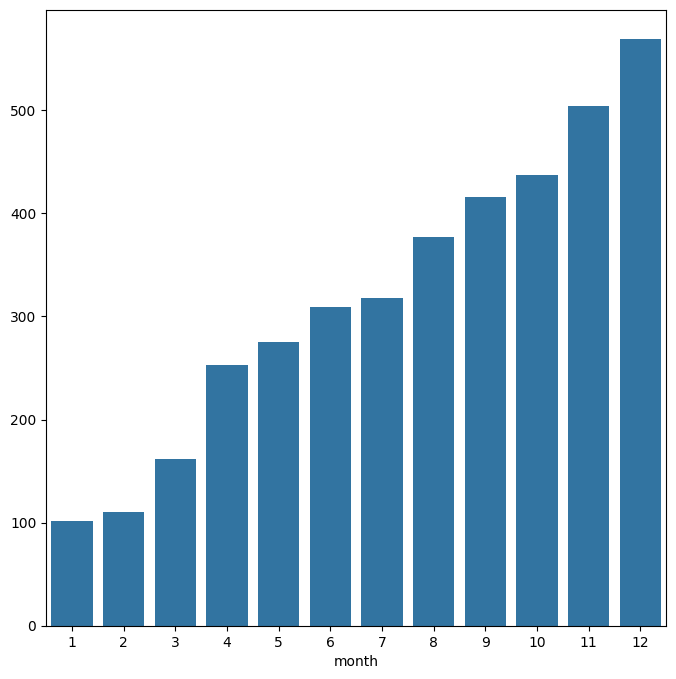

In [35]:
plt.figure(figsize=(8, 8))

sns.barplot(x=mau.index, y=mau.values)

plt.show()

In [36]:
sales = [120, 150, 80, 200, 250, 300, 50, 180, 210, 130, 90, 500]

# создаем DataFrame
df_sales = pd.DataFrame(sales, columns=['values'])

# сортируем значения (если нужно)
df_sales_sorted = df_sales.sort_values(by='values')

# считаем медиану
median_value = df_sales['values'].median()
mean_value = df_sales['values'].mean().round()

print("Медиана:", median_value, 'Среднее:', mean_value)


Медиана: 165.0 Среднее: 188.0
